## インストール

In [ ]:
!pip install yfinance

In [ ]:
#matplotlibをインストール
!pip install matplotlib

In [ ]:
#mplfinanceをインストール
!pip install mplfinance

In [ ]:
#TA-Libをインストール
!pip install TA-Lib

## データ収集&ローソク足の表示

In [5]:
#yfinanceとpandasをインポート
import yfinance as yf
import pandas as pd

#取得するデータ詳細
name = 'BTC-USD'
start = '2022-01-01'
end = '2023-01-01'

#データのダウンロード
df = yf.download(tickers=name, start=start, end=end)
df.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362


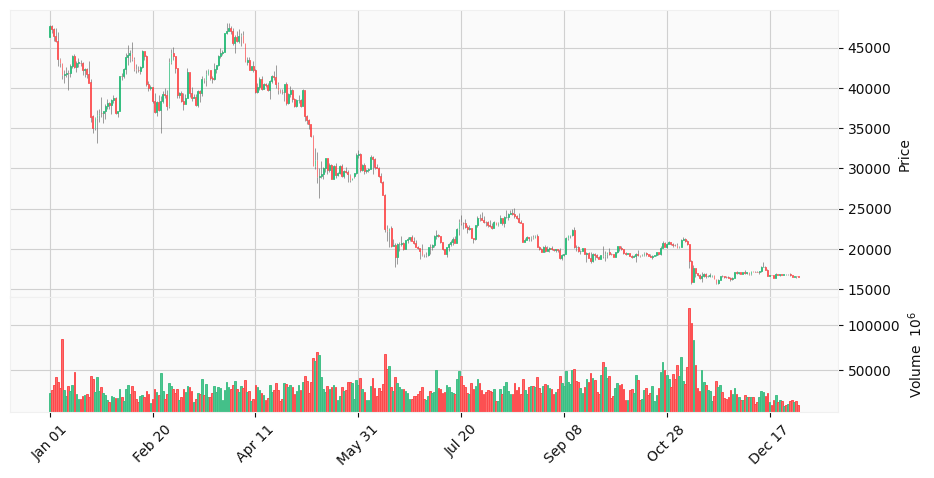

In [6]:
import mplfinance as mpf

mpf.plot(df, type="candle", figratio = (4, 2), volume=True, style="yahoo")

## SMA

In [7]:
import talib
import numpy as np

df['SMA20'] = talib.SMA(np.array(df['Close']), 20)
df['SMA50'] = talib.SMA(np.array(df['Close']), 50)
df['SMA100'] =  talib.SMA(np.array(df['Close']), 100)
df[['SMA20', 'SMA50', 'SMA100']].tail(3)

,SMA20,SMA50,SMA100
Date,,,
2022-12-29,16945.709570,16821.523574,18212.409941
2022-12-30,16919.402637,16801.839863,18192.961797
2022-12-31,16891.567773,16792.103926,18164.301250


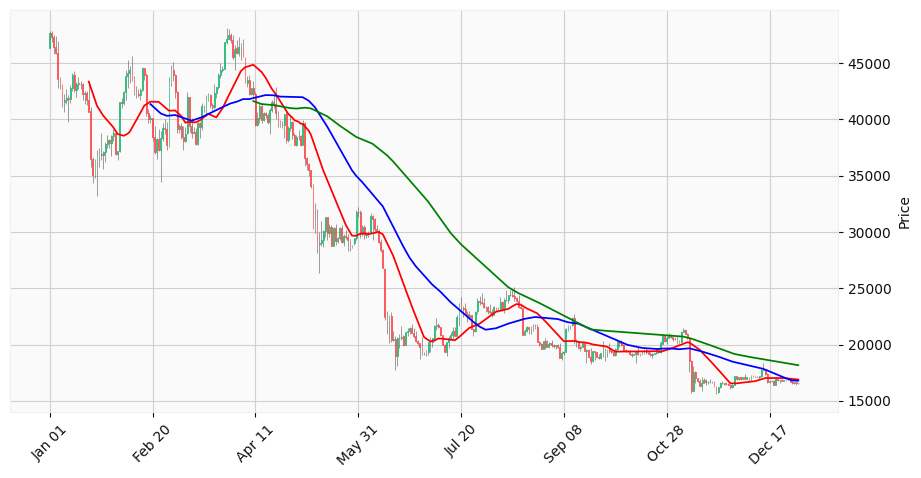

In [8]:
sma = [ mpf.make_addplot(df['SMA20'], color="red"),
        mpf.make_addplot(df['SMA50'], color="blue"),
        mpf.make_addplot(df['SMA100'], color="green")]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=sma)

## EMA

In [9]:
df['EMA20'] = talib.EMA(np.array(df['Close']), 20)
df['EMA50'] = talib.EMA(np.array(df['Close']), 50)
df['EMA100'] =  talib.EMA(np.array(df['Close']), 100)
df[['EMA20', 'EMA50', 'EMA100']].tail(3)

,EMA20,EMA50,EMA100
Date,,,
2022-12-29,16857.778948,17269.299841,18345.835924
2022-12-30,16833.474851,17243.154197,18311.316123
2022-12-31,16806.238779,17215.873488,18276.388993


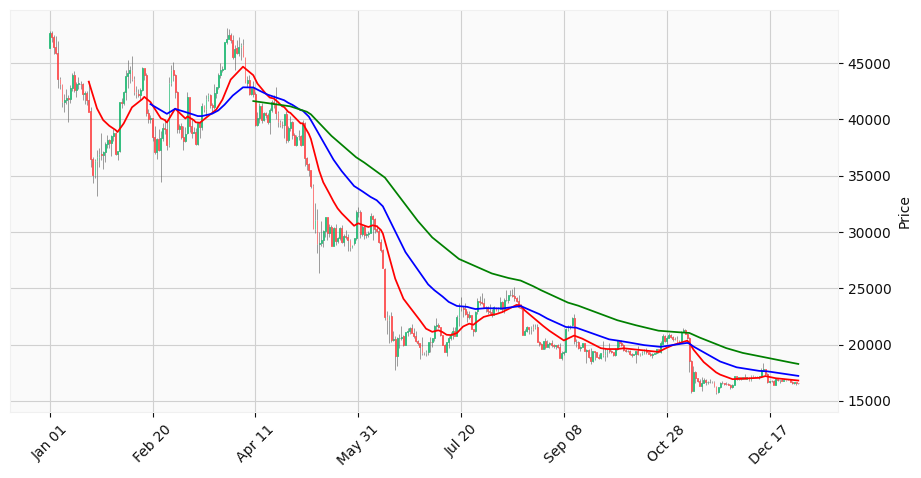

In [10]:
ema = [ mpf.make_addplot(df['EMA20'], color="red"),
        mpf.make_addplot(df['EMA50'], color="blue"),
        mpf.make_addplot(df['EMA100'], color="green")]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=ema)

## BB

In [43]:
bb_period = 10
sigma = 2
matype = 0

df['BB_up'], df['BB_middle'], df['BB_down'] = talib.BBANDS(np.array(df['Close']), bb_period, sigma, sigma, matype)
df[['BB_up', 'BB_middle', 'BB_down']].tail(3)

,BB_up,BB_middle,BB_down
Date,,,
2022-12-29,17008.412859,16787.276953,16566.141048
2022-12-30,16987.531515,16756.905078,16526.278641
2022-12-31,16987.470883,16729.901172,16472.331461


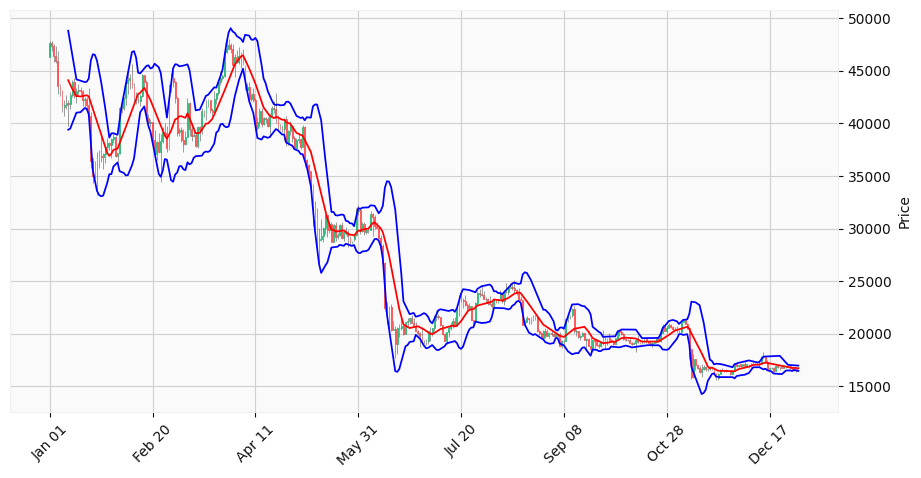

In [44]:
bb = [ mpf.make_addplot(df['BB_up'], color="blue"),
        mpf.make_addplot(df['BB_middle'], color="red"),
        mpf.make_addplot(df['BB_down'], color="blue")]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=bb)

## RSI

In [41]:
rsi_period = 14

df['RSI'] = talib.RSI(df['Close'])
df['RSI_SMA14'] = talib.SMA(np.array(df['RSI']), rsi_period)
df[['RSI', 'RSI_SMA14']].tail(3)

,RSI,RSI_SMA14
Date,,
2022-12-29,44.125248,45.155021
2022-12-30,43.408369,45.219953
2022-12-31,42.380864,45.054581


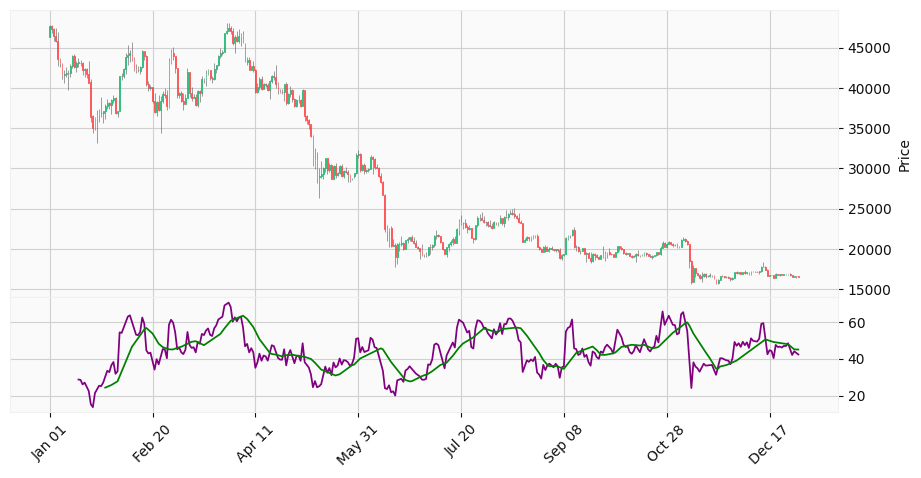

In [54]:
rsi = [ mpf.make_addplot(df['RSI'], color="purple",panel=1),
        mpf.make_addplot(df['RSI_SMA14'], color="green",panel=1)]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=rsi)

## MACD

In [53]:
fast_period = 12
slow_period = 26
signal_period = 9

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(df['Close'], fast_period, slow_period, signal_period)
df[['MACD', 'MACD_signal', 'MACD_hist']].tail(3)

,MACD,MACD_signal,MACD_hist
Date,,,
2022-12-29,-125.238723,-110.046230,-15.192493
2022-12-30,-130.839866,-114.204957,-16.634909
2022-12-31,-138.131805,-118.990327,-19.141478


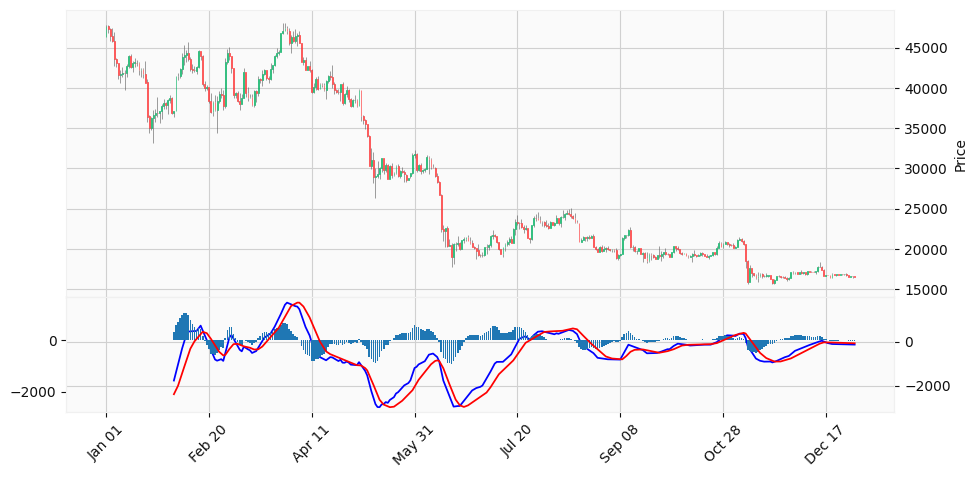

In [77]:
macd = [
    mpf.make_addplot(df["MACD"], color='blue', panel=1),
    mpf.make_addplot(df["MACD_signal"], color='red', panel=1),
    mpf.make_addplot(df["MACD_hist"],type='bar', panel=1)
]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=macd)

## ATR

In [80]:
atr_period = 3
df["ATR"] = talib.ATR(np.array(df['High']), np.array(df['Low']), np.array(df['Close']), timeperiod=atr_period)
df[['ATR']].tail(3)

,ATR
Date,
2022-12-29,197.939283
2022-12-30,210.277230
2022-12-31,177.340419


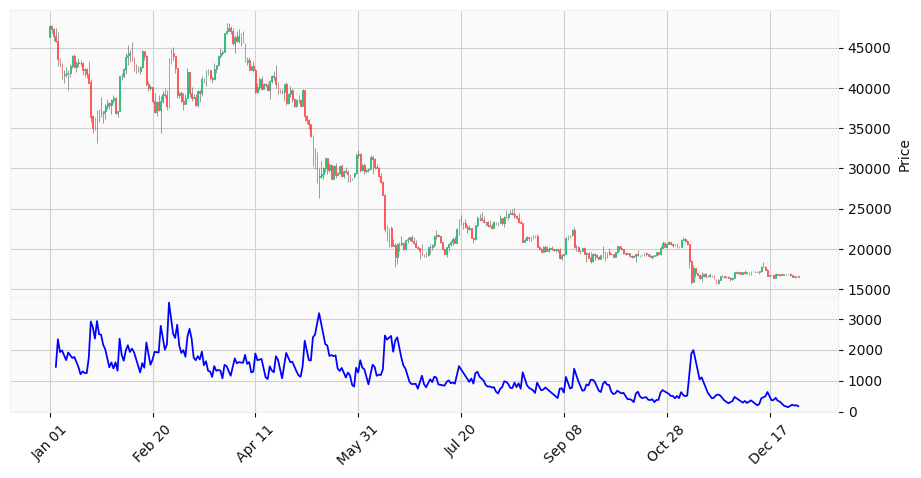

In [82]:
atr = [mpf.make_addplot(df["ATR"], color='blue', panel=1)]

mpf.plot(df, type="candle", figratio = (4, 2), style="yahoo", addplot=atr)